## 0. Load the libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


##Introduction of this project



In [3]:
# The purpose of this project is to analyze voter registration trends from the years 2016 and 2020 in the 11 states given in the data.
# The goal of this project is to present data in a way people can understand so that they can make informed choices. For example, spending more money on a campaign in one state compared to another.
# It is important for someone to read this notebook to understand how voting trends have changed between 2016 and 2020 given the states in the data.
# Question 1: How did the total number of new registered voters in the U.S. change between 2016 and 2020, and were there significant differences in voter registration patterns during election years?
# Question 2: How did the monthly distribution of new registered voters in California differ between 2016 and 2020?

## 1. Data Processing

Here are the first 5 rows of the data we will be working with

In [4]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


This line checks for missing data

In [5]:
voters.isna()

,Jurisdiction,Year,Month,New registered voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


In [6]:
voters.isnull().values.any()

False

This checks our data types

In [7]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


I renamed the "Jurisdiction" column to "NAME"

In [8]:
voters=voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


What is a limitation in the data?

In [9]:
# A limitation to the data is the given states not having all the same months. For example, some states have data for the month May while some states do not.

###Exploratory Data Analysis (20 points, as noted)

California had the highest amount of registered voters in February 2020



In [10]:
highest_scores=voters.loc[voters.registered_voters==voters.registered_voters.max()]
highest_scores

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The average voter registration was 48,223

In [11]:
voters["registered_voters"].mean()

48223.46226415094

The following columns show the state, year, and month where the number of registered voters was higher than the average of registered voters


In [12]:
voters["high_voters"]=voters["registered_voters"]>=48223

In [13]:
voters.loc[voters.high_voters==True]

,NAME,Year,Month,registered_voters,high_voters
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
5,Arizona,2020,Feb,50853,True
8,California,2016,Jan,87574,True
9,California,2016,Feb,103377,True
10,California,2016,Mar,174278,True
11,California,2016,Apr,185478,True
12,California,2020,Jan,151595,True
13,California,2020,Feb,238281,True
14,California,2020,Mar,176810,True


Shows how many times states when below the average registration, False, and above the average registration, True.



In [14]:
voters.high_voters.value_counts()

,count
high_voters,
False,70
True,36


California, Texas, and Florida had the highest average registered voters

In [15]:
highest_avg=voters.groupby(["NAME"])["registered_voters"].mean()
highest_avg.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization

This data visualization shows voter registratation by state. Larger populated states correlates with larger voter registration.


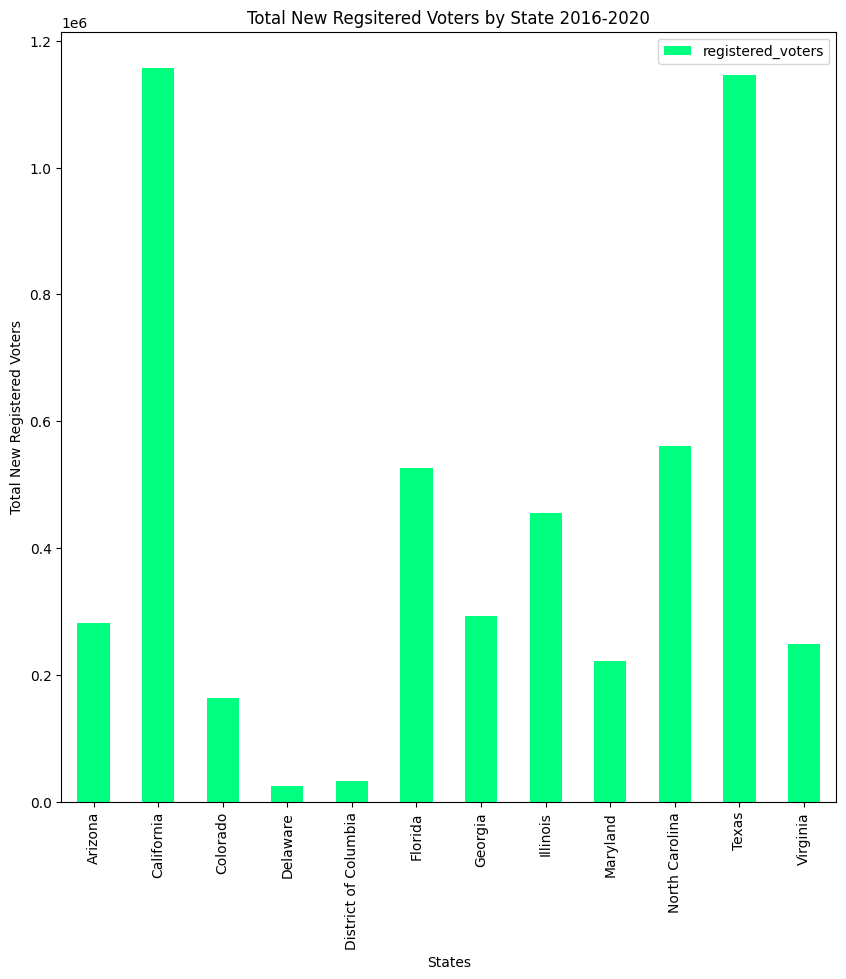

In [16]:
state_totals= voters.groupby(["NAME"])["registered_voters"].sum().reset_index()
state_totals.plot(kind="bar", x="NAME", y="registered_voters", figsize=(10,10), color=["SpringGreen"])
plt.xlabel("States")
plt.ylabel("Total New Registered Voters")
plt.title("Total New Regsitered Voters by State 2016-2020")
plt.show()

This plot comparing voter registation in 2016 and 2020.

Lower registrations in April 2020 compared to April 2016, likely due to COVID-19 disrupting in-person registration

A rise in registrations before major primaries, especially in February and March

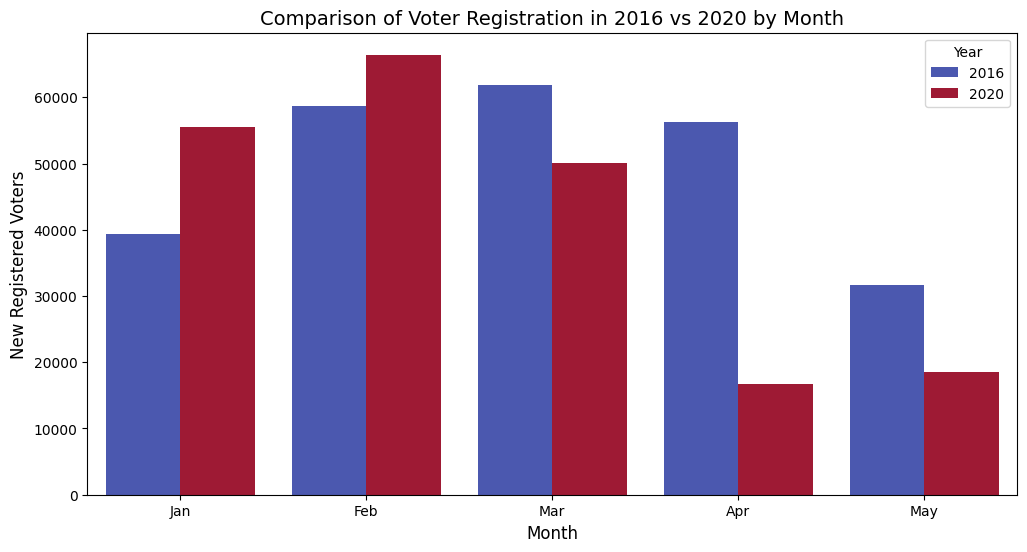

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(voters, x="Month", y="registered_voters", hue="Year", palette="coolwarm", errorbar=None)
plt.xlabel("Month", fontsize=12)
plt.ylabel("New Registered Voters", fontsize=12)
plt.title("Comparison of Voter Registration in 2016 vs 2020 by Month", fontsize=14)
plt.legend(title="Year")
plt.show()

This data visualization answers research question 2. You can see the dip in 2020 which came from COVID-19

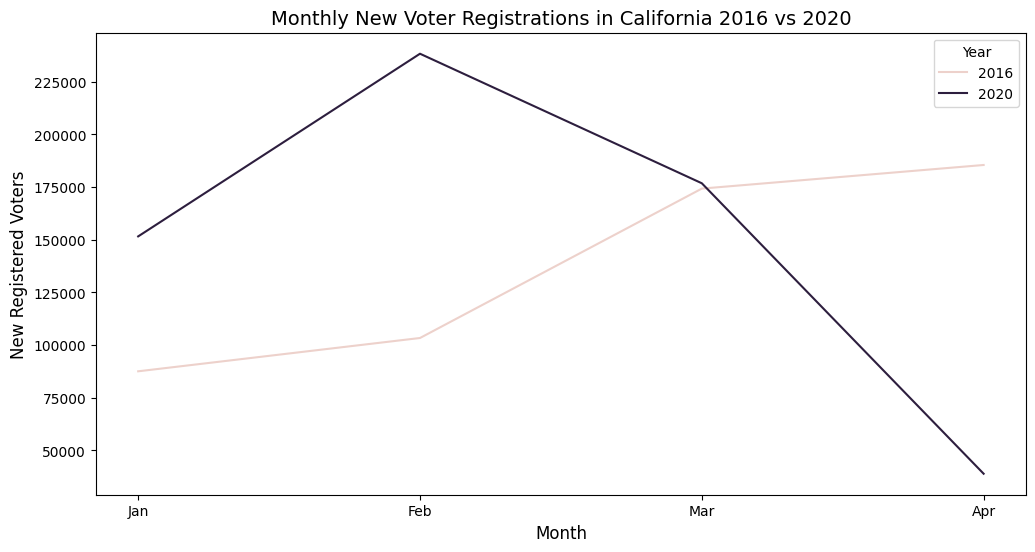

In [19]:
california_voters = voters[voters["NAME"] == "California"]
plt.figure(figsize=(12, 6))
sns.lineplot(california_voters, x="Month", y="registered_voters", hue="Year")
plt.xlabel("Month", fontsize=12)
plt.ylabel("New Registered Voters", fontsize=12)
plt.title("Monthly New Voter Registrations in California 2016 vs 2020", fontsize=14)
plt.legend(title="Year")
plt.show()

##Mapping



In [20]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [21]:
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"

states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [22]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

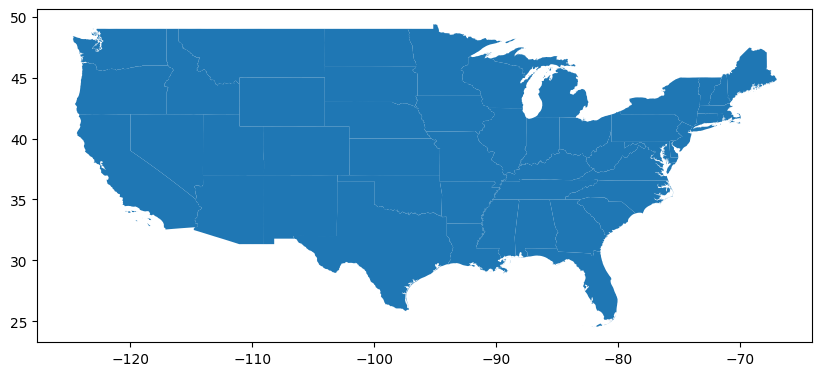

In [23]:
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))
plt.show()

The following dataframe shows the average voter registration per state

In [24]:
avg_voter_reg = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_voter_reg

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


We will be merging the above data with our mapping data shown below

In [25]:
merged_data = pd.merge(states, avg_voter_reg, on="NAME", how="inner")
merged_data

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Here we can see a map featuring the average voter registration per state. California had the highest while Colorado and Deleare had the lowest.



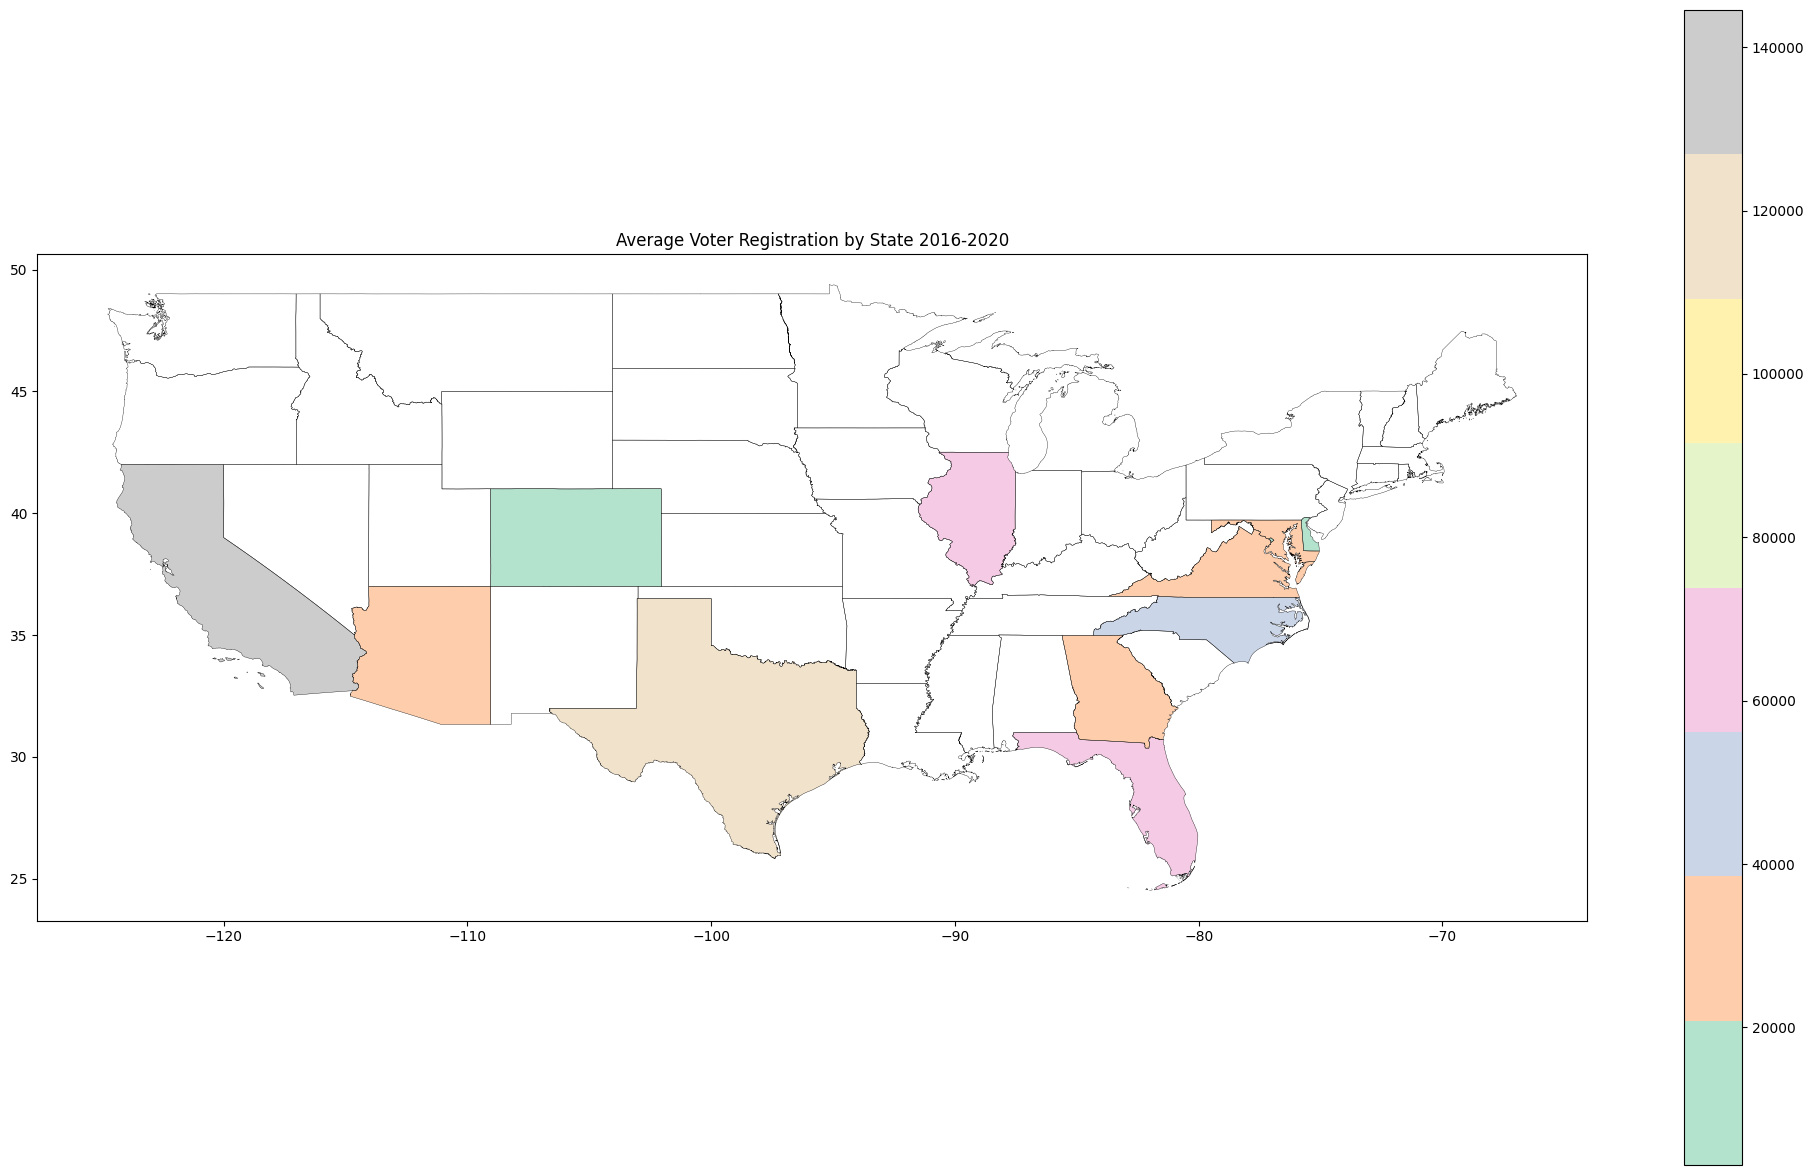

In [26]:
fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot()
bbox.boundary.plot(ax=ax, color="black", linewidth=.25)
merged_data.plot(column="registered_voters", cmap="Pastel2", legend=True, ax=ax)
plt.title("Average Voter Registration by State 2016-2020")
plt.show()

# Conclusion
In my notebook, there were many different trends in voter registration across the United States with the given data. There were many different patterns in voter registration, with some showing higher registration numbers than others. The notebook also showed changes in monthly registrations, most likely caused by election cycles and events like the COVID-19 pandemic. This impacted 2020 registration data harshly. The data visualization of average voter registration per state highlights these differences.
I would suggest including demographic data like age, race, and income level. This would allow for a more thorough analysis of registration trends within specific data. Additionally, considering factors like economic conditions, policy changes, or social movements during each period could provide better context to voter registration patterns.
If I were to keep working on this project, I would use data on voter turnout with registration numbers. By doing this, you can compare data between the number of new registrations and the actual number of voters participating in elections. This would provide better insight into the relationship between registration and participation and could provide insights for future voter outreach campaigns.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [30]:
# https://github.com/owhite3/325-Midterm.git

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [28]:
# Owen White